# PyTorch Workflow

Let's explore an example PyTorch end-to-end workflow

Resources:
* Ground truth notebook  -
* Book version of the notebook -
* Ask a question -


In [ ]:
what_were_covering = {1: "data (prepare and load)",
                      2: "build model",
                      3: "fitting the model to data (training)",
                      4: "making predictions and evaluating a model (inference)",
                      5: "saving and loading a model",
                      6: "putting it all together"}
what_were_covering


{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluating a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [ ]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks.
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.8.0+cu126'

## 1. Data (preparing and loading)

Data can be almost anything... in machine learning.

* Excel spreadsheet
* Images of any kind
* Videos (YouTube has lots of data...)
* Audio like songs or podcasts
* DNA
* Text

Machine learning is a game of two parts:
1. Get data into a numerical representation.
2. Build a model to learn patterns in that numerical representation.

To showcase this, let's create some *known* data using the linear regression formula.

We'll use a linear regression formula to make a straight line with known parameters.

Y = a + bX


In [ ]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create some data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1) # typically X refers to a matrix or tensor in ML.
y = weight * X + bias # this is the function we are using.
X[:10], y[:10] #, len(X), len(y). get the first ten

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
len(X), len(y)

(50, 50)

### Splitting data into training and test sets (one of the most important concepts in machine learning in general)

Let's create a training and test set for our data.
Training 80%
Test 20%

In [ ]:
# Create a train/test split
train_split = int(0.8 * len(X)) # 80% of the samples, which is 40 in this case
X_train, y_train = X[:train_split], y[:train_split] # get the first 40 of each
X_test, y_test = X[train_split:], y[train_split:] # from index 40 and up which is the last 10

len(X_train), len(y_train), len(X_test), len(y_test)


(40, 40, 10, 10)

How might we better visualize our data?

This is where the data explorer's motto comes in!

"Visualize, visualize, visualize!"

In [ ]:
# Function for plotting data
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  # Are there predictions?
  if predictions is not None:
    # Plot the predictions if they exist
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

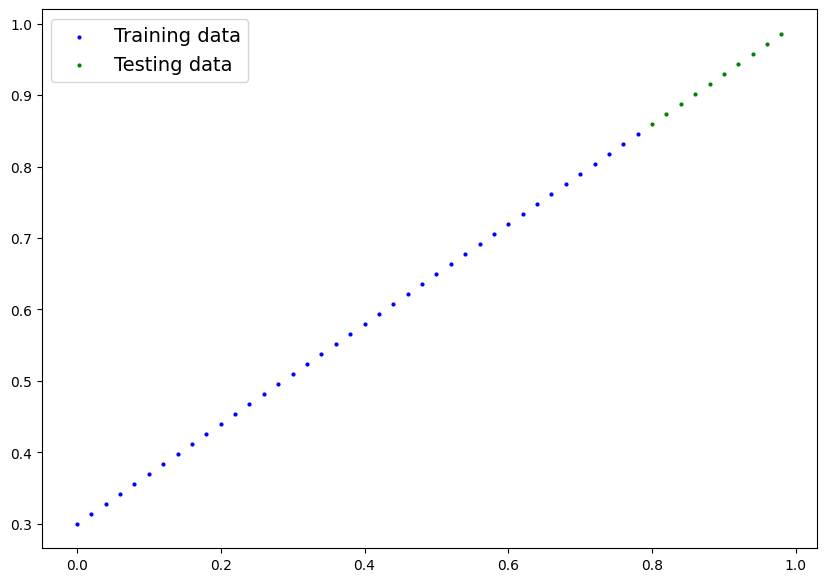

In [ ]:
plot_predictions()

## 2. Build model, yay!

What our model does:
* Start with random values (weight & bias)
* Look at training data and adjust the random values to better represent (or get closer to) the ideal values (the weight & bias values we used to create the data)

How does it do so?

Through two main algorithms:
1. Gradient descent
2. Backpropagation

OOP Documentation: https://realpython.com/python3-object-oriented-programming/

In [ ]:
from torch import nn
# Create a linear regression model class
# it inherits from nn.Module
# give it a constructor and define a forward function for the neural network training.
class LinearRegressionModel(nn.Module): # Almost everything in PyTorch inherits from nn.Module
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))

  # If you are going to inherit from nn.Module, override the Forward Method
  # Forward method to define the computation in the model.
  def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x"
    return self.weights * x + self.bias # linear regression formula

### PyTorch model buliding essentials
* torch.nn - contains all of the building blocks for computational graphs (a neural network can be considered a computational graph)
* torch.nn.Parameter - what parameters should our model try and learn, often a PyTorch layer from torch.nn wil set these for us.
* torch.nn.Module - The base class for all neural network modeules, if you subclass it, you should override forward().
* torch.optim - this is where the optimizers in PyTorch live, they will help with gradient descent.
* def forward() - All nn.Module subclasses require you to override forward(), this method defines what happens in the forward computation.

https://docs.pytorch.org/tutorials/index.html

###Useful libraries for data prep

* torchvision.transforms
* torch.utils.data.Dataset
* torch.utils.data.DataLoader

### Useful libraries for models
* torch.nn
* torch.nn.Module
* torchvision.models

### For optimization
* torch.optim

### For evaluation
* torchmetrics

### For experimentation / improvements
* torch.utils.tensorboard

### Checking the contents of our PyTorch model

Now we've created a model, let's see what's inside...

So we can check our model parameters or what's inside our model using .parameters()

In [ ]:
# Create a random seed.
# Our models use random values, so here we are using a seed for testing purposes.
torch.manual_seed(42) # seed so that we get the same value each time.

# Create an instance of the model (this is a subclass of nn.Module)
model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
weight, bias

(0.7, 0.3)

In [ ]:
# start with random values and use gradient descent and backpropagation to
# adjust the values as close to the ideal values as possible

### Making predictions using `torch.inference_mode()`

To check our model's predictive power, let's see how well it predicts `y_test` based on `x_test`

When we pass data through our model, it's going to run it through the forward method.

In [ ]:
# Make predictions with model. `with` ensures that resources are properly
# cleaned up after execution. inference mode removes the gradient data
# thus speeding up the code execution. you can also do something similar
# with torch.no_grad(), however inference mode is preferred.
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

See more on inference mode here - https://x.com/PyTorch/status/1437838231505096708?lang=en

In [ ]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

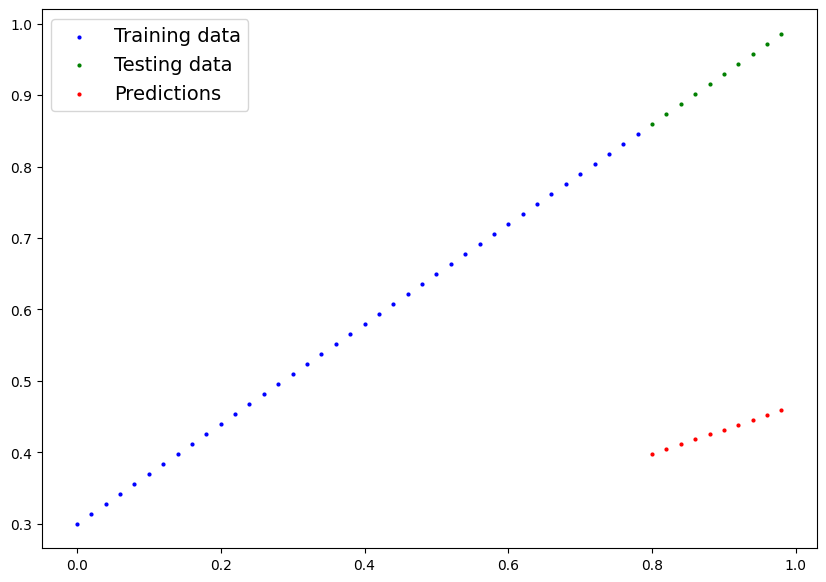

In [ ]:
plot_predictions(predictions=y_preds)

## 3. Train model

The whole idea of training is for a model to move from some *unknown* parameters (these may be random) to some *known* parameters.

Or in other words from a poor representation of the data to a better representation of the data.

One way to measure how poor the model's predictions are is to use a loss function.

PyTorch has some built in loss functions. Cost Function, loss function, criterion, etc.

This we need to train:

** Loss function: ** A function to measure how wrong your model's predictions are when compared to the ideal outputs. (lower is better)
** Optimizer:** Takes into account the loss of a model and adjusts the model's parameters (e.g. weight and bias) to improve the loss function.

* Inside the optimizer you'll often have to set two parameters:
  * `params` - the model parameters you'd like to optimize, for example, params=model_0.parameters
  * `lr` (learning rate) - the learning rate is the hyperparameter that defines the rate at which the optimizer adjusts the parameters with each iteration / step. A small lr results in small changes, a big lr results in large changes.

Loss functions:
https://docs.pytorch.org/docs/stable/nn.html#loss-functions

And specifically for PyTorch, we need:
* A training loop
* A testing loop

In [ ]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

Which loss function should you use? You won't really know until you start working hands on with a specific problem.

L1 loss is like the "mean of the loss"

Optimizer functions: https://docs.pytorch.org/docs/stable/optim.html#module-torch.optim


In [ ]:
# Check out our model's parameters ( a parameter is a value that the model sets itself)
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
# Setup a loss function to reduce MAE. Measure how wrong the model is.
loss_fn = nn.L1Loss() # mainly for checking the difference between the training / test data and the predictions. see the loop for more details.

# Setup an optimizer (stochastic gradient descent).
# Optimize the model to reduce the loss.
# The higher the learning rate, the more it adjusts each of its pramaters in one hit (one iteration).
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01) # lr = learning rate = possibly the most important hyperparameter you can set (the params we can set)

*Q*: Which loss function and optimizer should I use?

*A*: This will be problem specific, but with experience, you'll get an idea of what works and what doesn't for your particular problem set.

For example, for a regression problem (like ours), a loss function of `nn.L`Loss()` and an optimizer like `torch.optim.SGD()` will suffice.

For a classification problem like classifying whether a photo shows a dog or a cat, you'll likely want to use a loss function of `nn.BCELoss()` (binary cross entropy loss).

### Building a training loop (and a testing loop) in PyTorch

A couple of things we need in a training loop:
0. Loop through the data
1. Forward pass (this involves data moving through our model's `forward()` functions such as the one we wrote for our model. Also called forward propagation) to make predictions on data
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Loss backward - move backwards through the network to calculate the gradients of each of the parameters of our model with respect to the loss (**backpropagation**)
5. Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss (**gradient descent**).

In [ ]:
# An epoch is one loop through the data...
# this is a hyper parameter because we set it ourselves
epochs = 1

### Training
# 0. Loop through the data
for epoch in range(epochs):
  # Set the model to training mode
  model_0.train() # train mode in PyTorch sets all parameters that require gradients to require gradients
  # model_0.eval() # turns off gradient tracking

  # 1. Forward pass. we learn patterns on the training data to evaluate our model on the test data.
  y_pred = model_0(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train) # compare prediction data to training data. input vs. target

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropagation on the loss with respect to the parameters of the model
  loss.backward()

  # 5. Step the optimizer
  # By default how the optimizer changes will accumulate through
  # the loop so... we have to zero them above in step three
  optimizer.step()






In [ ]:
## Rewrite the loop for fun!
epochs = 200 # hyperparameter

# keep track of the training runs (epochs)
epoch_count = []
loss_values = [] # keep track of MAE: Mean Absolute Error
test_loss_values = []

for epoch in range(epochs):
  model_0.train() # the default mode that the model is in.
  y_pred = model_0(X_train) # pass in the training data and generate predictions
  loss = loss_fn(y_pred, y_train) # check the difference between the prediction and training data
  optimizer.zero_grad() # the gradients acumulate over time in each step so we want to zero them
  loss.backward() # compute the gradient of every parameter with `requires_grad=True`
  optimizer.step()
  ### Testing ### inference_mode() improves performance
  model_0.eval() # turns off different setting in the model not needed for evaluation / testing. (dropout / batchnorm layers)
  with torch.inference_mode(): #turns off gradient tracking & a couple more things behind the scenes
    # 1. Do the forward pass
    test_pred = model_0(X_test) # try the model on test data that it hasn't seen yet.
    # 2. Calculate the loss
    test_loss = loss_fn(test_pred, y_test) # test the model against test data. data that it has never seen before.

  # don't print every single epoch, just show every 10,
  # and the final iteration, equal to epochs - 1. (count starts from 0)
  if epoch % 50 == 0 or epoch == epochs - 1:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")


Epoch: 0 | Loss: 0.3013603389263153 | Test loss: 0.4675942063331604
Epoch: 50 | Loss: 0.04132963344454765 | Test loss: 0.09809747338294983
Epoch: 100 | Loss: 0.024110013619065285 | Test loss: 0.05536102131009102
Epoch: 150 | Loss: 0.006941580679267645 | Test loss: 0.0153720797970891
Epoch: 199 | Loss: 0.008932482451200485 | Test loss: 0.005023092031478882


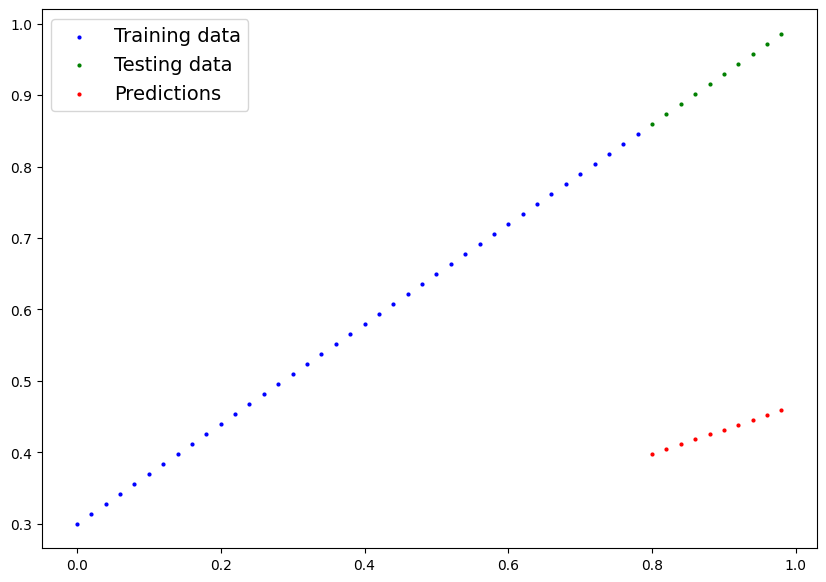

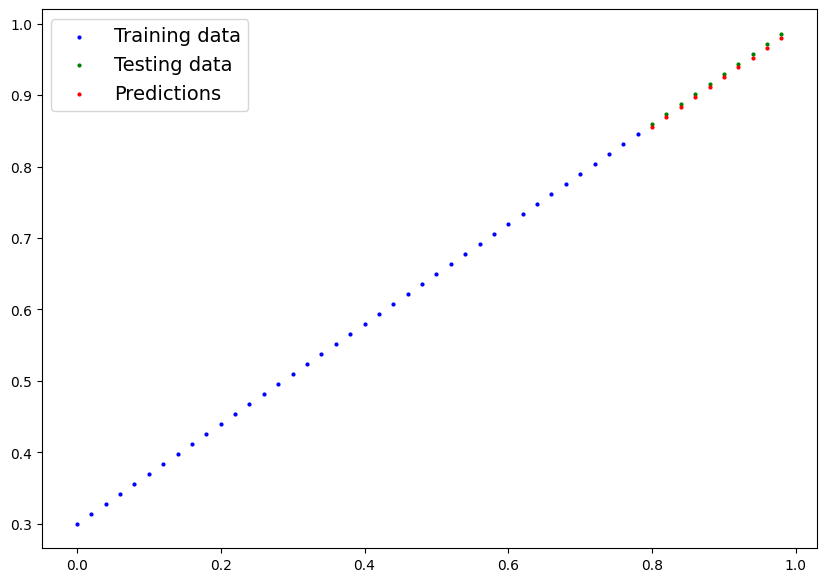

In [ ]:
## FYI: y_preds is a Tensor reference, not a value, so it updates when the
## model goes through training.
plot_predictions(predictions=y_preds)
with torch.inference_mode():
  y_preds_new = model_0(X_test)
plot_predictions(predictions=y_preds_new)

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6951])), ('bias', tensor([0.2993]))])

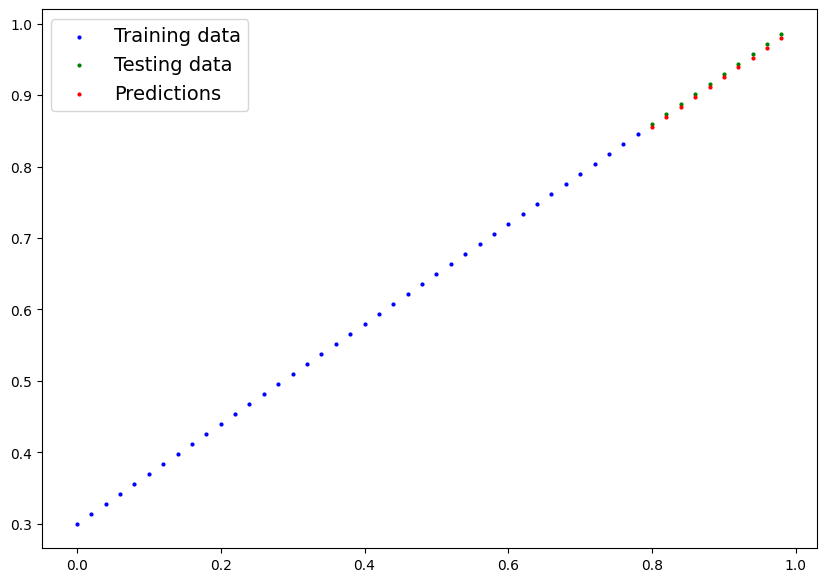

In [ ]:
plot_predictions(predictions=y_preds_new)

In [ ]:
type(y_preds)

torch.Tensor

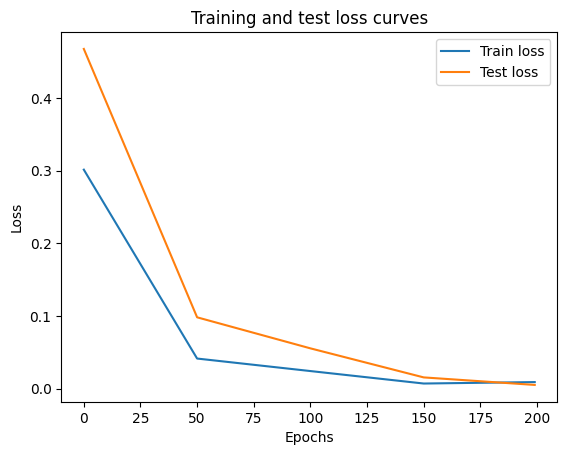

In [ ]:
# Turn the tensor into a numpy ndarray for graphing purposes.
# Matplotlib doesn't play well with the Tensor + grad format.
import numpy as np
loss_values_numpy = np.array(torch.tensor(loss_values).numpy()) #, test_loss_values
# Plot the loss curves
plt.plot(epoch_count, loss_values_numpy, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

### Saving a model in PyTorch

There are three main methods you should know about for saving and loading models in PyTorch.

1. `torch.save()` - allows you to save a PyTorch object in Python's pickle format (Python object serialization).
2. `torch.load()` - allows you to load a saved PyTorch object
3. `torch.nn.Module.load_state_dict() - this allows you to load a model's saved state dictionary. https://docs.pytorch.org/tutorials/beginner/saving_loading_models.html

In [ ]:
# Saving our PyTorch model. It's also possible to save it to Google drive
from pathlib import Path # Path from pathlib utils.
# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_0.pth


In [ ]:
!ls -l models

total 8
-rw-r--r-- 1 root root 2125 Oct  2 01:46 01_pytorch_workflow_model_01.pth
-rw-r--r-- 1 root root 2117 Oct  2 03:03 01_pytorch_workflow_model_0.pth


### Loading a model in PyTorch

In [ ]:
model_1 = LinearRegressionModel()
model_1.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
# Test the loaded model. Compare its weights and bias to the original model.
model_1.state_dict(), model_0.state_dict()

(OrderedDict([('weights', tensor([0.6951])), ('bias', tensor([0.2993]))]),
 OrderedDict([('weights', tensor([0.6951])), ('bias', tensor([0.2993]))]))

In [ ]:
# Make some predictions with our loaded model
model_1.eval()
with torch.inference_mode():
  loaded_model_preds = model_1(X_test)

loaded_model_preds == y_preds ## we found out that the preds must have been modified somewhere above.


tensor([[False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False]])

In [ ]:
model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)

loaded_model_preds == y_preds


tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## 6. Putting it all together

Let's go back through the steps above and see it all in one place.

### 6.0 Import libs

In [ ]:
# Import PyTorch and other libs
import torch
from torch import nn
import matplotlib.pyplot as plt

Create device-agnostic code. This means that if we've got access to a GPU, our code will use it. If no GPU is available, the code will default to using the CPU.

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


In [ ]:
!nvidia-smi

Thu Oct  2 03:03:37 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   78C    P0             34W /   70W |     158MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

### 6.1 Data

In [ ]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create some data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1) # typically X refers to a matrix or tensor in ML.
y = weight * X + bias # this is the function we are using.

# Create a train/test split
train_split = int(0.8 * len(X)) # 80% of the samples, which is 40 in this case
X_train, y_train = X[:train_split], y[:train_split] # get the first 40 of each
X_test, y_test = X[train_split:], y[train_split:] # from index 40 and up which is the last 10

### 6.2 Model

In [ ]:
class LinearRegressionModel(nn.Module): # Almost everything in PyTorch inherits from nn.Module
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))

  def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x"
    return self.weights * x + self.bias # linear regression formula

In [ ]:
# Create an instance of the model (this is a subclass of nn.Module)
model_01 = LinearRegressionModel()

In [ ]:
# Setup a loss function to reduce MAE. Measure how wrong the model is.
loss_fn = nn.L1Loss()

# Setup an optimizer (stochastic gradient descent).
# Optimize the model to reduce the loss.
# The higher the learning rate, the more it adjusts each of its pramaters in one hit (one iteration).
optimizer = torch.optim.SGD(params=model_01.parameters(),
                            lr=0.01) # lr = learning rate = possibly the most important hyperparameter you can set (the params we can set)

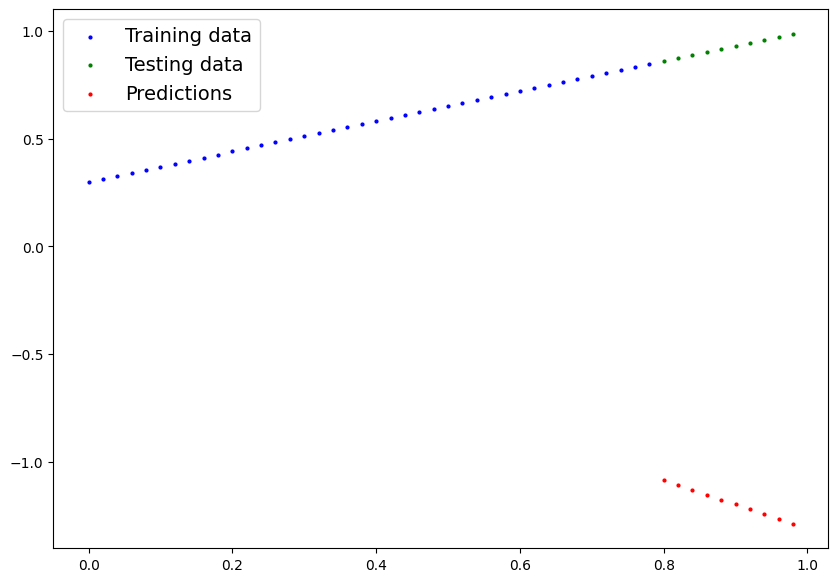

In [ ]:
# Pre-training predictions. Check what the predictions look like before we train the model.
with torch.inference_mode():
  y_preds = model_01(X_test)

plot_predictions(predictions=y_preds)

### 6.3 Training loop

In [ ]:
# An epoch is one loop through the data. This is a hyper parameter because we set it ourselves.
epochs = 300

# keep track of the training runs (epochs)
epoch_count = []
loss_values = [] # keep track of MAE: Mean Absolute Error
test_loss_values = []

### 0. Training, loop through the data
for epoch in range(epochs):
  # Set the model to training mode
  model_01.train() # train mode in PyTorch sets all parameters that require gradients to require gradients
  y_pred = model_01(X_train) # 1. Forward pass. we learn patterns on the training data to evaluate our model on the test data.
  loss = loss_fn(y_pred, y_train) # # 2. Calculate the loss. Compare prediction data to training data. input vs. target
  optimizer.zero_grad() # 3. Optimizer zero grad
  loss.backward() # 4. Perform backpropagation on the loss with respect to the parameters of the model
  optimizer.step() # 5. Step the optimizer. By default how the optimizer changes will accumulate through. The loop so... we have to zero them above in step three

  ### Testing ### inference_mode() improves performance
  model_01.eval() # turns off different setting in the model not needed for evaluation / testing. (dropout / batchnorm layers)
  with torch.inference_mode(): #turns off gradient tracking & a couple more things behind the scenes
    # 1. Do the forward pass
    test_pred = model_01(X_test) # try the model on test data that it hasn't seen yet.
    # 2. Calculate the loss
    test_loss = loss_fn(test_pred, y_test) # test the model against test data. data that it has never seen before.

  # don't print every single epoch, just show every 10,
  # and the final iteration, equal to epochs - 1. (count starts from 0)
  if epoch % 50 == 0 or epoch == epochs - 1:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Loss: 1.197242259979248 | Test loss: 2.0951993465423584
Epoch: 50 | Loss: 0.62235027551651 | Test loss: 1.4226481914520264
Epoch: 100 | Loss: 0.3332693576812744 | Test loss: 0.9419782757759094
Epoch: 150 | Loss: 0.26441916823387146 | Test loss: 0.7065517902374268
Epoch: 200 | Loss: 0.239961177110672 | Test loss: 0.5928755402565002
Epoch: 250 | Loss: 0.22207458317279816 | Test loss: 0.5323523879051208
Epoch: 299 | Loss: 0.204973503947258 | Test loss: 0.4783555567264557


### 6.4 Plot Trained Predictions

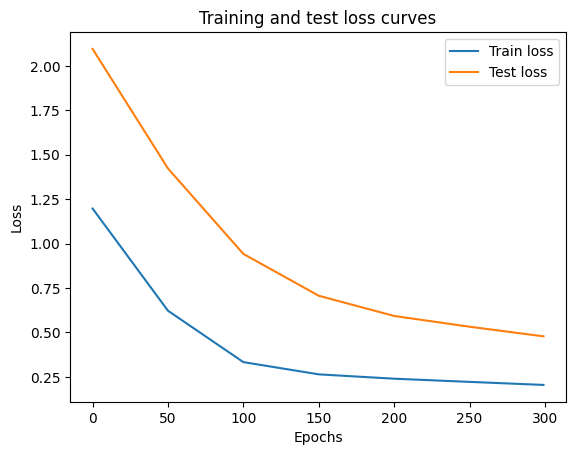

In [ ]:
import numpy as np
loss_values_numpy = np.array(torch.tensor(loss_values).numpy()) #, test_loss_values
# Plot the loss curves
plt.plot(epoch_count, loss_values_numpy, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

### 6.5 Save and load the model

In [ ]:
# Saving our PyTorch model. It's also possible to save it to Google drive
from pathlib import Path # Path from pathlib utils.
# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_01.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_01.state_dict(), f=MODEL_SAVE_PATH)

# 3. Instantiate a new model to load the Python dict into.
model_001 = LinearRegressionModel()
model_001.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
# Test the loaded model. Compare its weights and bias to the original model.
model_001.state_dict(), model_01.state_dict()

# 4. Evaluate the loaded model against the model that was saved.
model_001.eval() # the loaded model
with torch.inference_mode():
  loaded_model_preds_review = model_001(X_test)

model_01.eval() # the original
with torch.inference_mode():
  y_preds_review = model_01(X_test)

loaded_model_preds_review ==  y_preds_review


Saving model to: models/01_pytorch_workflow_model_01.pth


tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

# Extra Practice

In [ ]:
# Import PyTorch and other libs
import torch
from torch import nn
import matplotlib.pyplot as plt

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


In [ ]:
# Create some data using the linear regression formula of y = weight * X + bias
weight = 0.7
bias = 0.3

# Create range values
start = 0
end = 1
step = 0.02

# Create X and y (features and label)
X = torch. arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
# Split data (80% and round to an int)
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

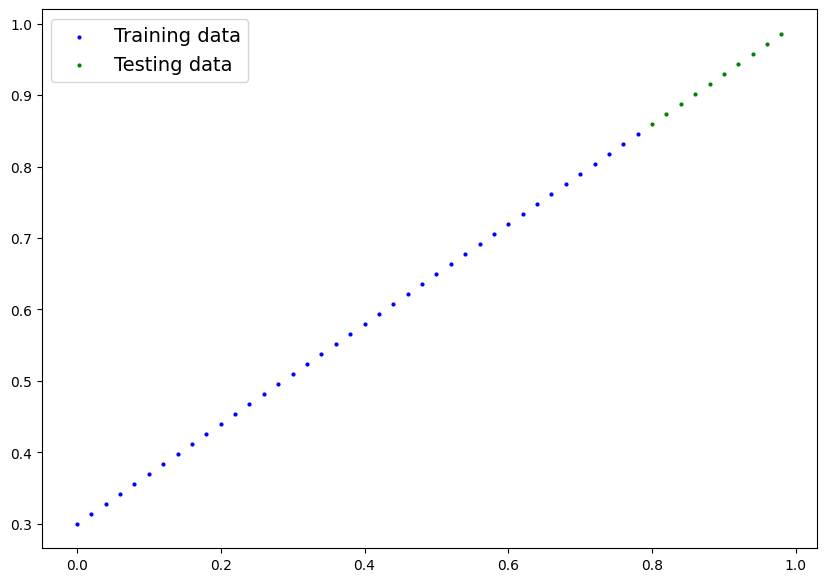

In [ ]:
# Plot the data
# Note: if you don't have the plot_predictions() function loaded, this will error
plot_predictions(X_train, y_train, X_test, y_test)

In [ ]:
# Create a linear model by subclassing nn.Module
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    # Use nn.Linear() for creating the model parameters
    # The layers do some of the work for us.
    # check TORCH.NN for more layer options.
    self.linear_layer = nn.Linear(in_features=1,
                                  out_features=1)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    # Linear layer will perform the forward computation that we previously
    # had to do manually. (mX+b slope formula)
    return self.linear_layer(x)

# Set the manual seed for reproducability.
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
# Linear layer has a weight and bias included, which
# replaces the weight and bias code we wrote for the original version.
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [ ]:
# Check which device the model is running on.
# get the next paramater using an iterator and find out
# which device that parameter lives on.
next(model_1.parameters()).device

device(type='cpu')

In [ ]:
# Set the model to use the target device
# send the model to GPU
device = "cuda" if torch.cuda.is_available() else "cpu"
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

In [ ]:
### TRAINING
# Loss function - measure how wrong the model is
# Optimizer - optimize params to try and reduce error
# Training loop - run the functions
# Testing loop - test

loss_fn = nn.L1Loss() # same as MAE

optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.01)


In [ ]:
torch.manual_seed(42)

epochs = 200

# Put the data on target device to avoid errors.
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  model_1.train()
  # 1. Forward pass
  y_pred = model_1(X_train) # the forward pass now uses the Linear layer.
  # 2. Calculate loss - see how bad the model was. haha
  loss = loss_fn(y_pred, y_train)

  # 3. Optimizer zero grad - zero the gradients. start fresh
  optimizer.zero_grad()

  # 4. Perform backpropagation
  loss.backward() # calculate the loss with respect to each param in the model.

  # 5. Optimizer step
  optimizer.step()

  ### Testing
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)
    test_loss = loss_fn(test_pred, y_test)

  if epoch % 20 == 0:
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Loss: 0.5551779866218567 | Test loss: 0.5739762187004089
Epoch: 20 | Loss: 0.3247582018375397 | Test loss: 0.30455657839775085
Epoch: 40 | Loss: 0.09433845430612564 | Test loss: 0.03513690456748009
Epoch: 60 | Loss: 0.019956795498728752 | Test loss: 0.045803118497133255
Epoch: 80 | Loss: 0.013089174404740334 | Test loss: 0.02994490973651409
Epoch: 100 | Loss: 0.006215683650225401 | Test loss: 0.014086711220443249
Epoch: 120 | Loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 140 | Loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 160 | Loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 180 | Loss: 0.0012645035749301314 | Test loss: 0.013801801018416882


In [ ]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [ ]:
weight, bias

(0.7, 0.3)

### Make and evaulate some predictions.

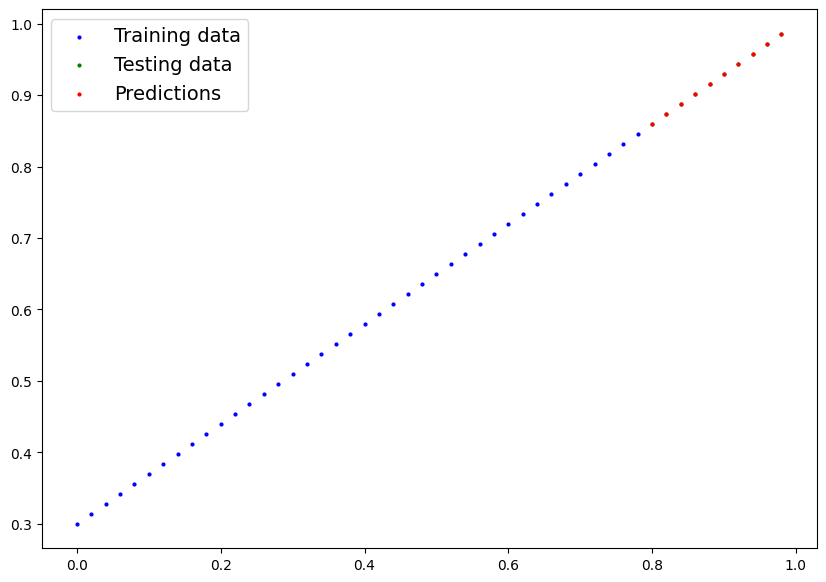

In [ ]:
model_1.eval()
with torch.inference_mode():
  test_preds_2 = model_1(X_test)
# type(test_preds_2) #Tensor
test_preds_2_cpu = test_preds_2.cpu()
# type(test_preds_2_cpu) Moved the Tensors to the CPU so that
# they play nice with Matplotlib.
plot_predictions(predictions=test_preds_2_cpu)

In [ ]:
# set up a path
from pathlib import Path
DIRECTORY_NAME = Path("test_directory")
# make directory
DIRECTORY_NAME.mkdir(parents=True, exist_ok=True)
# save the file
MODEL_NAME = "our_amazing_test_model_01.pt"
MODEL_SAVE_PATH = DIRECTORY_NAME / MODEL_NAME
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(), f=MODEL_SAVE_PATH)

resurrected_model = LinearRegressionModelV2()
resurrected_model.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
model_1.state_dict(), resurrected_model.state_dict()


Saving model to: test_directory/our_amazing_test_model_01.pt


(OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
              ('linear_layer.bias', tensor([0.3025], device='cuda:0'))]),
 OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
              ('linear_layer.bias', tensor([0.3025]))]))

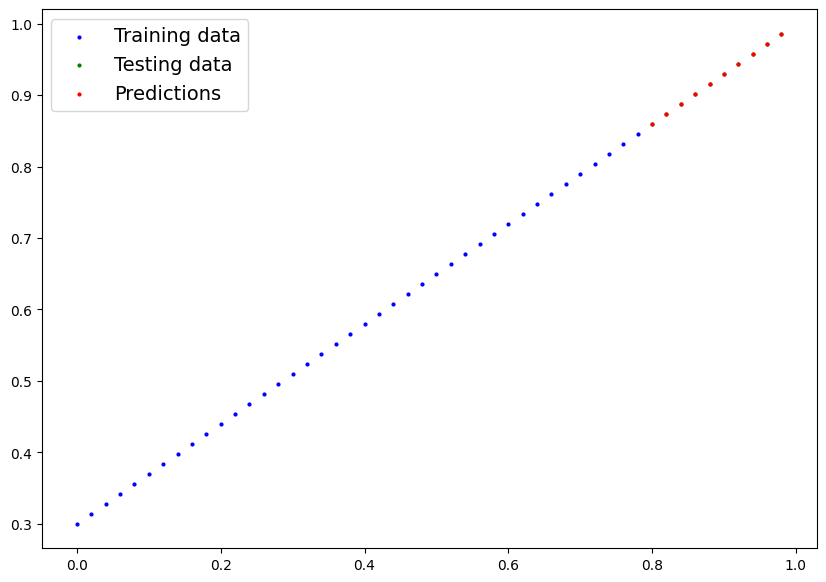

In [ ]:
resurrected_model.eval()
with torch.inference_mode():
  resurrected_model_preds = resurrected_model(X_test.cpu())

plot_predictions(predictions=resurrected_model_preds)

# Exercises and Extra Curricular Stuff

https://www.learnpytorch.io/01_pytorch_workflow/#extra-curriculum